### Exercise 3
## Data representation and feature engineering

In this excercise we want to accurately represent all of the numerical columns.
We can also use this section to do some feature engineering.
Let's look back to the data description to see where there could be room for improvement

In [1]:
f = open('data/bank-names.txt', 'r')
file_contents = f.read()
print(file_contents)
f.close()

Citation Request:
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

1. Title: Bank Marketing

2. Sources
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   
3. Past Usage:

  The full dataset was described and analyzed in:

  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European S

One column we may want to refactor is the 'pdays' column. Currently, if the customer was not contacted the value is '-1', whereas if they were contacted the number of days are listed. There are two pieces of information encoded in this one columns that we may want to separate. They are:
- Whether or not they were contacted
- If they were contacted, how long ago was that last contact made

When we create column,s they should ideally align with hypotheses we create of relationships between the features and the target.
One hypothesis may be that if the customer was targeted they may be more likely to subscribe to the product. Given our column we could test this hypothesis by converting the 'pdays' column into a binary variable indicating whether they were contacted or not. This can be achieved by looking to see if the value of 'pdays' is '-1', if so we will associate that with a value of 0, otherwise they have been contacted so the value will be 1.
A second hypothesis is that the more recently the customer was contacted the greater likelihood will be for them to subscribe. There are many ways to encode this second hypothesis. I recommend encoding the first one, and if we see that this feature has predictive power we can implement the second hypothesis.

First let's load in the data

In [2]:
import pandas as pd
bank_data = pd.read_csv('data/bank_data_feats_e2.csv', index_col=0)

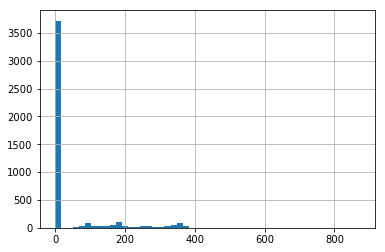

In [3]:
%matplotlib inline
bank_data['pdays'].hist(bins=50)

There are a lot of rows with -1 as the value let's see how many

In [4]:
bank_data[bank_data['pdays']==-1]['pdays'].count()

3705

3705 in total, let's look at a histogram with

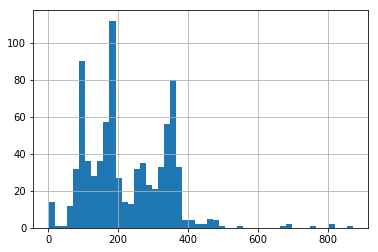

In [5]:
bank_data[bank_data['pdays']>0]['pdays'].hist(bins=50)

Now we can encode whether the customer was contacted

In [6]:
bank_data['was_contacted'] = bank_data['pdays'].apply(lambda row: 0 if row == -1 else 1)

Now the column is encoded and we are ready to test the first hypothesis, we can drop the pdays columns and save the dataset

In [7]:
bank_data.drop('pdays', axis=1, inplace=True)
bank_data[['was_contacted']].head(n=10)

,was_contacted
0,0
1,1
2,1
3,0
4,0
5,1
6,1
7,0
8,0
9,1


Finally, we save the feature dataset to a csv file for use later.

In [8]:
bank_data.to_csv('data/bank_data_feats_e3.csv')